## k-means in class assignment

you are provided a file with RGB triples for a bunch of colors.  

the problem is that even though there are plenty of RBG-to-color converters on the web
https://www.rapidtables.com/convert/color/rgb-to-hex.html

for example, these two RGB triples look almost identical to the human eye
 - [0, 0, 255]
 - [0, 1, 255]
 
**none of them tell you that "this color is close to blue"**

the task is to use k-means clustering to 
- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked


In [50]:
import pandas
import os
import ast
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline


## read in colors

In [22]:
df_colors = pandas.read_csv("colors.csv")

df_colors['top_color'] = df_colors['top_color'].apply(ast.literal_eval)
df_colors['rgb'] = df_colors.top_color.apply(lambda x: np.array([x['red'], x['green'], x['blue']]))
df_colors['red'] = df_colors.top_color.apply(lambda x: x['red'])
df_colors['green'] = df_colors.top_color.apply(lambda x: x['green'])
df_colors['blue'] = df_colors.top_color.apply(lambda x: x['blue'])

df_colors

,colors,hymnal_id,image,top_color,rgb,red,green,blue
0,"[{'color': {'red': 233, 'green': 197, 'blue': ...",48720,mobile_background_image,"{'red': 233, 'green': 197, 'blue': 146, 'alpha...","[233, 197, 146]",233,197,146
1,"[{'color': {'red': 183, 'green': 97, 'blue': 5...",48720,desktop_background_image,"{'red': 183, 'green': 97, 'blue': 58, 'alpha':...","[183, 97, 58]",183,97,58
2,"[{'color': {'red': 188, 'green': 84, 'blue': 7...",48720,video_thumbnail,"{'red': 188, 'green': 84, 'blue': 7, 'alpha': ...","[188, 84, 7]",188,84,7
3,"[{'color': {'red': 247, 'green': 252, 'blue': ...",48546,mobile_background_image,"{'red': 247, 'green': 252, 'blue': 254, 'alpha...","[247, 252, 254]",247,252,254
4,"[{'color': {'red': 248, 'green': 253, 'blue': ...",48546,desktop_background_image,"{'red': 248, 'green': 253, 'blue': 253, 'alpha...","[248, 253, 253]",248,253,253
...,...,...,...,...,...,...,...,...
2025,"[{'color': {'red': 27, 'green': 123, 'blue': 1...",45943,video_thumbnail,"{'red': 27, 'green': 123, 'blue': 141, 'alpha'...","[27, 123, 141]",27,123,141
2026,"[{'color': {'red': 194, 'green': 193, 'blue': ...",48604,video_thumbnail,"{'red': 194, 'green': 193, 'blue': 198, 'alpha...","[194, 193, 198]",194,193,198
2027,"[{'color': {'red': 41, 'green': 113, 'blue': 1...",45942,mobile_background_image,"{'red': 41, 'green': 113, 'blue': 197, 'alpha'...","[41, 113, 197]",41,113,197
2028,"[{'color': {'red': 35, 'green': 114, 'blue': 1...",45942,desktop_background_image,"{'red': 35, 'green': 114, 'blue': 197, 'alpha'...","[35, 114, 197]",35,114,197


## visualize some colors 

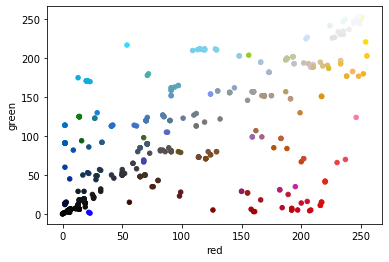

In [23]:
# get first X colors
n = 500
colors = df_colors.rgb[:n]/256
df_colors[:n].reset_index(drop=False).plot(x='red', y='green', kind='scatter', color=colors )


## prepare dataset for sklearn

In [24]:
use_cols = ['red', 'green', 'blue']
X = np.array(df_colors[use_cols].values)
X

array([[233, 197, 146],
       [183,  97,  58],
       [188,  84,   7],
       ...,
       [ 41, 113, 197],
       [ 35, 114, 197],
       [ 27, 123, 141]])

## use k-means for clustering

In [25]:
n_clusters = 10
random_state = 10

In [26]:
## get instance of model
model = KMeans(10, random_state=random_state)

## fit model 
model.fit(X)

## predict cluster
df_colors['cluster'] = model.predict(X)



## make a histogram of your color clusters to see the dsitribution of colors


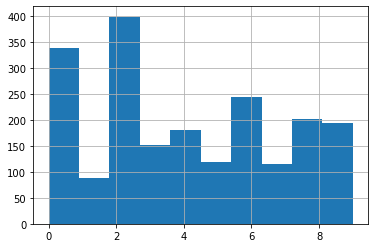

In [27]:
# get distribution of clusters
df_colors.cluster.hist()


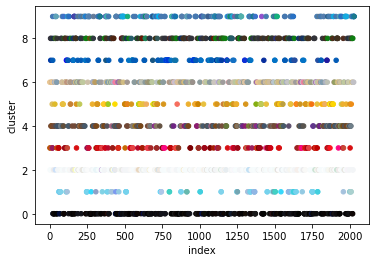

In [28]:
# take a look at distribution of colors
colors = df_colors.rgb/256
df_colors.reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors)

## establish some human-readable names for your clusters like red, blue, yellow, etc.


In [29]:
# name your clusters
color_dict = {
    0:'black',    
    1:'light blue',  
    2:'off white', 
    3:'red', 
    4:'brown',
    5:'yellow',
    6:'gray',     
    7:'blue', 
    8:'green', 
    9:'blue gray', 
}


## determine the centroids of the clusters



In [56]:
# get the centroids
model.cluster_centers_


array([[ 13.74260355,  12.25739645,  16.14201183],
       [117.68181818, 203.02272727, 228.02272727],
       [244.11278195, 246.61904762, 246.12531328],
       [192.65562914,  29.58940397,  38.8013245 ],
       [105.6961326 ,  88.13259669,  85.56353591],
       [224.60504202, 181.31092437,  42.06722689],
       [184.58606557, 176.51229508, 159.07377049],
       [  5.40869565,  84.85217391, 195.19130435],
       [ 47.96517413,  65.42288557,  46.38308458],
       [ 58.28865979, 131.82989691, 179.89690722]])

In [55]:
all_rows = list()
for ii,cc in enumerate(model.cluster_centers_):

    row_dict= {'cluster':ii, 'color':color_dict[ii], 'red':cc[0], 'green':cc[1], 'blue':cc[2]}
    all_rows.append(row_dict)
    
    
df_colors_clusters = pandas.DataFrame(all_rows)
df_colors_clusters

,cluster,color,red,green,blue
0,0,black,13.742604,12.257396,16.142012
1,1,light blue,117.681818,203.022727,228.022727
2,2,off white,244.112782,246.619048,246.125313
3,3,red,192.655629,29.589404,38.801325
4,4,brown,105.696133,88.132597,85.563536
5,5,yellow,224.605042,181.310924,42.067227
6,6,gray,184.586066,176.512295,159.073770
7,7,blue,5.408696,84.852174,195.191304
8,8,green,47.965174,65.422886,46.383085
9,9,blue gray,58.288660,131.829897,179.896907


## write a function that makes the best guess of an RGB triple based on the centroids


In [37]:
# determine color of individual RGB triple based on distance from centroid
def closest_color(rgb, df):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    
    current_min = 1e10
    current_color = None
    for ii,rr in df.iterrows():
        dist = np.sqrt( (red-rr['red'])**2 +  (green-rr['green'])**2 + (blue-rr['blue'])**2 )
        if dist < current_min:
            current_min = dist
            current_color = rr['color']
    
    return current_color


In [46]:
test_color = [100,60,60]

# use function to predict color
closest_color(test_color, df_colors_clusters)

'brown'

In [49]:
# use model to predict color

predict = model.predict( [test_color])
[ color_dict[cc] for cc in predict]

['brown']

## make some visual output to show that your guesses worked


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


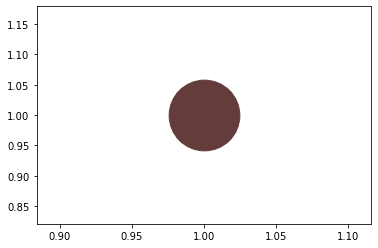

In [54]:

c = [ cc/255 for cc in test_color]  # normalize 

x=[1]
y = [1]

plt.scatter(x,y,c=c , s=5000)